# 1. Import module

In [58]:
# scrape data
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re
import unicodedata

# machine learning
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 2. Scrape data(Argentina Players)

press 'All' tab, then https://sofifa.com/players?offset=0 (page1) https://sofifa.com/players?offset=80 (page2) : Page


press 'flag' then https://sofifa.com/players?na=52 (Argentinia) https://sofifa.com/players?na=14 (England) : Nation Code


press 'next'tab in the bottoom  https://sofifa.com/players?na=52&offset=80  : Nation code + page


press an individual player https://sofifa.com/player/142959 (each players' id for the attributes)

 To extract the each players' attributes, we need to acquire the players id consisting of numbers. (ex "https://sofifa.com/player/142959")
 
 1. The "requests.get()" function creates a request object for each page
 
 
 2. Each page's content (html code) is downloaded and parsed by the "BeautifulSoup()" function with the argument "html.parser"
 
 
 3. The "find_all()" function of the BeautifulSoup object is used to get the all the contents with tag "a"
 
 
 4. The "href" tag is used to locate and extract all the URL links with tag "a" (.get: extract the text in each HTML sentence. ex '/player/142780' extract)
 
 
 5. now the links variable has the links for the players attributes.     ex) "https://sofifa.com/player/142959"
 
 
 
"for j,link in enumerate(links)"

1. 

In [59]:
attributes=['Crossing','Finishing','Heading accuracy',
 'Short passing','Volleys','Dribbling','Curve',
 'Free kick accuracy','Long passing','Ball control','Acceleration',
 'Sprint speed','Agility','Reactions','Balance',
 'Shot power','Jumping','Stamina','Strength',
 'Long shots','Aggression','Interceptions','Positioning',
 'Vision','Penalties','Composure','Marking',
 'Standing tackle','Sliding tackle','GK diving',
 'GK handling','GK kicking','GK positioning','GK reflexes']


links=[]   #get all argentinian players

for offset in ['0','80','160','240','320','400','480','560']:

    page=requests.get('http://sofifa.com/players?na=52&offset='+offset) 

    soup=BeautifulSoup(page.content,'html.parser')

    for link in soup.find_all('a'):

        links.append(link.get('href'))

links=['http://sofifa.com'+l for l in links if 'player/'in l]  



#pattern regular expression 

pattern=r"""\s*([\w\s]*?)\s*FIFA"""   #file starts with empty spaces... players name...FIFA...other stuff     

for attr in attributes:

    pattern+=r""".*?(\d*\s*"""+attr+r""")"""  #for each attribute we have other stuff..number..attribute..other stuff

pat=re.compile(pattern, re.DOTALL)    #parsing multiline text
  




rows=[]

links=links[10:]

for j,link in enumerate(links):

    # print(j,link)

    row=[link]

    playerpage=requests.get(link)

    playersoup=BeautifulSoup(playerpage.content,'html.parser')
    
    text=playersoup.get_text() #only for the attributes. get_text()

    text=unicodedata.normalize('NFKD', text).encode('ascii','ignore')
    #some of them are not English

    a=pat.match(text.decode('utf-8'))

    row.append(a.group(1))

    for i in range(2,len(attributes)+2):

        row.append(int(a.group(i).split()[0]))

    rows.append(row)

    # print(row[1])

df=pd.DataFrame(rows,columns=['link','name']+attributes)

# save the dataset in a .csv file
df.to_csv('ArgentinaPlayers.csv',index=False)

# 3. Scrape data(English Player)

We should change the URL 'http://sofifa.com/players?na=52' to  'http://sofifa.com/players?na=14'. And since we need 480 players, change offset list to '['0','80','160','240','320','400']'. Not all players can match our regular expression,so we only get 465 data finally.

In [72]:
attributes=['Crossing','Finishing','Heading accuracy',
 'Short passing','Volleys','Dribbling','Curve',
 'Free kick accuracy','Long passing','Ball control','Acceleration',
 'Sprint speed','Agility','Reactions','Balance',
 'Shot power','Jumping','Stamina','Strength',
 'Long shots','Aggression','Interceptions','Positioning',
 'Vision','Penalties','Composure','Marking',
 'Standing tackle','Sliding tackle','GK diving',
 'GK handling','GK kicking','GK positioning','GK reflexes']


links=[]   #get all argentinian players

for offset in ['0','80','160','240','320','400']:

    page=requests.get('http://sofifa.com/players?na=14&offset='+offset) 

    soup=BeautifulSoup(page.content,'html.parser')

    for link in soup.find_all('a'):

        links.append(link.get('href'))

links=['http://sofifa.com'+l for l in links if 'player/'in l]  



#pattern regular expression 

pattern=r"""\s*([\w\s]*?|[\w\-\w\s]*?|[\w\'\w\s]*?)\s*FIFA"""   #file starts with empty spaces... players name...FIFA...other stuff     

for attr in attributes:

    pattern+=r""".*?(\d*\s*"""+attr+r""")"""  #for each attribute we have other stuff..number..attribute..other stuff

pat=re.compile(pattern, re.DOTALL)    #parsing multiline text
  




rows=[]

links=links[10:]

for j,link in enumerate(links):
    
    # print(j,link)
    #print(link)
    row=[link]

    playerpage=requests.get(link)

    playersoup=BeautifulSoup(playerpage.content,'html.parser')
    
    text=playersoup.get_text() #only for the attributes. get_text()

    text=unicodedata.normalize('NFKD', text).encode('ascii','ignore')
    #some of them are not English

    a=pat.match(text.decode('utf-8'))
    print(a.group(1))
    row.append(a.group(1))

    for i in range(2,len(attributes)+2):

        row.append(int(a.group(i).split()[0]))

    rows.append(row)

    # print(row[1])

df=pd.DataFrame(rows,columns=['link','name']+attributes)

# save the dataset in a .csv file
df.to_csv('EnglandPlayers.csv',index=False)

Jack Butland
Wayne Rooney
Leighton Baines
Danny Rose
Phil Jones
Jordan Henderson
Chris Smalling
Jamie Vardy
Tom Heaton
Joe Hart
Michael Keane
Nathaniel Clyne
Marcus Rashford
Danny Welbeck
John Stones
Jermain Defoe
Michael Carrick
Phil Jagielka
James Milner
Ryan Bertrand
Theo Walcott
Danny Drinkwater
Ben Foster
Ryan Shawcross
Alex Oxlade-Chamberlain
Jesse Lingard
Gareth Barry
Kieran Trippier
James Ward-Prowse
Kieran Gibbs
Andy Carroll
Troy Deeney
Charlie Austin
Andros Townsend
Fabian Delph
Jordan Pickford
Luke Shaw
Jack Cork
Ben Mee
Michail Antonio
Harry Maguire
Nathan Redmond
Jay Rodriguez
Ashley Young
Marc Albrighton
Andre Gray
Fraser Forster
Curtis Davies
Scott Dann
Jonjo Shelvey
Scott Sinclair
Danny Ings
Tom Cleverley
Mark Noble
Liam Moore
Nathaniel Chalobah
Callum Wilson
Leon Britton
John Terry
Aaron Lennon
James Tarkowski
Simon Francis
Matthew Lowton
Andrew Surman
James Tomkins
Lewis Dunk
Steve Cook
Saido Berahino
Wayne Routledge
Dwight Gayle
Bradley Wright-Phillips
Nathan Dyer
Da

In [74]:
df = pd.read_csv('EnglandPlayers.csv')
print("The number of the players: %d" %(len(df)))

The number of the players: 470


# 4. Clustering

### Prepare data

In [75]:
X = df.iloc[:,2:].values * 1.0 # multiply by 1.0 to transform "int" to "float"

### Scale transformation

In [142]:
sdscaler = StandardScaler()
X_scale = sdscaler.fit_transform(X)

### Kmeans model

In [143]:
kmeans = KMeans(n_clusters=5)
predict_label = kmeans.fit_predict(X_scale)
predict_label

array([1, 0, 0, 0, 4, 0, 4, 0, 1, 1, 4, 0, 3, 3, 4, 3, 0, 4, 0, 0, 3, 0, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 1, 0, 0, 4, 0, 4, 3, 3, 3, 0, 3,
       1, 2, 2, 0, 3, 3, 0, 0, 4, 0, 3, 0, 2, 3, 4, 4, 0, 0, 2, 2, 2, 3, 3,
       3, 3, 3, 4, 0, 1, 4, 0, 2, 0, 0, 0, 3, 3, 4, 4, 3, 0, 4, 3, 0, 0, 3,
       3, 0, 0, 2, 0, 4, 1, 2, 0, 2, 0, 4, 0, 0, 3, 4, 4, 3, 4, 2, 0, 4, 1,
       1, 0, 1, 3, 0, 3, 2, 0, 2, 0, 0, 3, 3, 3, 0, 0, 2, 1, 4, 1, 2, 0, 0,
       3, 3, 4, 1, 3, 0, 3, 3, 0, 2, 0, 0, 4, 2, 0, 2, 3, 1, 3, 3, 3, 0, 0,
       3, 4, 0, 3, 1, 0, 0, 3, 4, 3, 4, 0, 3, 4, 1, 3, 4, 2, 1, 2, 0, 0, 3,
       4, 3, 3, 4, 3, 2, 0, 4, 3, 2, 4, 2, 2, 3, 0, 0, 3, 4, 0, 3, 2, 3, 0,
       3, 0, 4, 3, 4, 4, 4, 1, 2, 2, 2, 4, 3, 3, 3, 3, 3, 1, 4, 4, 4, 3, 1,
       3, 3, 4, 3, 3, 0, 2, 0, 0, 1, 0, 0, 3, 3, 0, 3, 4, 4, 3, 4, 4, 3, 2,
       3, 3, 3, 0, 2, 2, 3, 3, 4, 2, 3, 0, 2, 4, 0, 0, 0, 3, 4, 3, 3, 1, 2,
       0, 3, 2, 0, 3, 0, 4, 1, 3, 4, 4, 3, 4, 2, 4, 2, 0, 1, 0, 3, 0, 2, 0,
       4, 2,

### Visualization

In [144]:
# reduce the data to 2-dimension using t-SNE
tsne= TSNE(learning_rate=50)
data_for_visualization = tsne.fit_transform(X_scale)

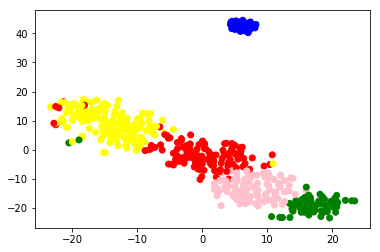

In [145]:
color_dict = {0:"red", 1:"blue", 2:"green", 3:"yellow", 4:"pink"}
predict_label = pd.DataFrame(predict_label, columns = ['label'])
color = list(predict_label.label.transform(lambda x: color_dict[x]))
plt.scatter(data_for_visualization[:,0], data_for_visualization[:,1], color=color)
plt.show()


# 5. Assign meaningful label

In [146]:
summary_scaled = sdscaler.fit_transform(df.iloc[:,2:])
summary_scaled_df = pd.DataFrame(data=summary_scaled)
summary_scaled_df.columns = list(df.columns[2:]) # rename the column
result = pd.concat([summary_scaled_df, pd.DataFrame(predict_label)], axis= 1)
result.rename({result.columns[-1]:'cluster_ID'}, axis=1,inplace=True)
result.groupby('cluster_ID').mean()[['Crossing', 'Sprint speed', 'Long shots', 'Aggression', 'Marking', 'Finishing', 'GK handling']]
#yellow(3): offender // red(0) and pink(4): MF // green(2): defender // blue(1): GK

,Crossing,Sprint speed,Long shots,Aggression,Marking,Finishing,GK handling
cluster_ID,,,,,,,
0,0.721216,-0.032627,0.742025,0.442993,0.583064,0.522646,-0.300902
1,-2.175515,-1.529954,-1.922838,-1.875357,-1.580177,-1.725776,3.447844
2,-0.950713,-1.007141,-1.202496,0.554595,0.694572,-1.027545,-0.280349
3,0.169691,0.686481,0.607402,-0.463034,-0.956925,0.749442,-0.277879
4,0.259398,0.199557,-0.346916,0.458848,0.837301,-0.479413,-0.246618


# 6. Prediction

In [147]:
select_list = [2, 13, 21, 22, 28, 3, 32] # create a list for target columns
df_selected = df.iloc[:,select_list]
center_value = kmeans.cluster_centers_[:, [2, 13, 21, 22, 28, 3, 32]] # select relative data in cluster center
center_value # the center of 5 clusters

array([[ 0.1632236 ,  0.39623909,  0.63626652,  0.59014626,  0.62097872,
         0.71887377, -0.27953527],
       [-2.32251012,  0.14362114, -1.51119498, -1.97959025, -1.58970818,
        -2.23209342,  3.44917912],
       [ 0.71200358, -0.55654603,  0.68336457, -1.08784407,  0.58887017,
        -0.49892518, -0.27921418],
       [-0.13176986, -0.13524946, -0.94530829,  0.53407541, -0.90982023,
         0.04031879, -0.27410887],
       [ 0.35186268,  0.0388748 ,  0.73917389, -0.1093334 ,  0.79318814,
         0.18240736, -0.27911785]])

In [148]:
new_player = np.array([45, 40, 35, 45, 60, 40, 15]).reshape(1,-1)*1.0 # multiply by 1.0 to transform "int" to "float"
sdscaler.fit(df_selected.values * 1.0)
new_player_scaled = sdscaler.transform(new_player)
new_player_scaled # new player' attribute after scaling

array([[-0.53832937, -1.84634546, -0.85941072, -0.97154048,  0.46263654,
        -0.46265563, -0.03370571]])

In [149]:
new_player_cluster = np.argmin(np.sum((center_value - new_player_scaled)**2, axis = 1))
print("new_player_cluster : %d\ncolor of the cluter: %s" %(new_player_cluster, color_dict[new_player_cluster])) #defender

new_player_cluster : 2
color of the cluter: green
